In [ ]:
import pandas as pd

df = pd.read_csv("https://github.com/rishikanchi/StartupUnicorns/raw/main/unicorn.csv")

In [ ]:
def string_converter(row):
  return float(row["Valuation ($B)"][1:])

df["Valuation ($B)"] = df.apply(string_converter , axis = 1)
df = df.drop(['Sno'], axis = 1)
df = df.rename(columns={'Inverstors': 'Investors', 'Investors Count': 'Investor Count', 'Total Raised': 'Total Raised ($M)'})

years = []
for date in df["Date Joined"]:
  years.append(date.split("/")[-1])
df["Year Joined"] = years

temp = []
for i in df['Investor Count']:
  if i == "None":
    temp.append(0)
  else:
    temp.append(int(i))
df['Investor Count'] = temp

temp = []
for string in df['Total Raised ($M)']:
  if (string == "None"):
    temp.append(0)
  elif (string[-1] == "B"):
    temp.append(float(string[1:-1])*1000)
  else:
    temp.append(float(string[1:-1]))
df['Total Raised ($M)'] = temp

temp = []
for i in df['Portfolio Exits']:
  if (i == 'None'):
    temp.append(0)
  else:
    temp.append(int(i))
df['Portfolio Exits'] = temp

temp = []
for i in df['Social media Presence']:
  if i == "Y":
    temp.append(1)
  else:
    temp.append(0)
df['Media As Int'] = temp

df = df.replace("None", 0)
temp = []
for i in range(len(df)):
  temp.append(int(df['Year Joined'][i]) - int(df['Founded Year'][i]))
df['Years to Become Unicorn'] = temp

df = df.reindex(columns=['Company','Valuation ($B)', 'Date Joined', 'Year Joined', 'Founded Year', 'Years to Become Unicorn', 'Country', 'City', 'Industry', 'Investors', "Total Raised ($M)", 'Financial Stage', 'Investor Count', "Deal Terms", 'Portfolio Exits', 'Unicorn Nest Website Link', 'Fund Structure', 'Social media Presence', "Media As Int"])

del df['Unicorn Nest Website Link']
del df['Fund Structure']

df

,Company,Valuation ($B),Date Joined,Year Joined,Founded Year,Years to Become Unicorn,Country,City,Industry,Investors,Total Raised ($M),Financial Stage,Investor Count,Deal Terms,Portfolio Exits,Social media Presence,Media As Int
0,Bytedance,140.0,4/7/2017,2017,2012,5,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",7440.00,IPO,28,8,5,Y,1
1,SpaceX,100.3,12/1/2012,2012,2002,10,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",6874.00,0,29,12,0,Y,1
2,Stripe,95.0,1/23/2014,2014,2010,4,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2901.00,Asset,39,12,1,Y,1
3,Klarna,45.6,12/12/2011,2011,2005,6,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",3472.00,Acquired,56,13,1,Y,1
4,Epic Games,42.0,10/26/2018,2018,1991,27,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",4377.00,Acquired,25,5,2,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,1.0,2/22/2022,2022,2015,7,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",181.06,0,7,2,0,Y,1
1033,Scalapay,1.0,2/23/2022,2022,2019,3,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",700.00,0,10,2,0,Y,1
1034,Omada Health,1.0,2/23/2022,2022,2011,11,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",449.72,0,30,6,0,Y,1
1035,BlueVoyant,1.0,2/23/2022,2022,2017,5,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",525.50,0,6,2,0,Y,1


Top 10 Highest Valuation Companies

In [ ]:
df.nlargest(10,"Valuation ($B)")[['Company', 'Valuation ($B)']]

,Company,Valuation ($B)
0,Bytedance,140.0
1,SpaceX,100.3
2,Stripe,95.0
3,Klarna,45.6
4,Epic Games,42.0
5,Canva,40.0
6,Checkout.com,40.0
7,Instacart,39.0
8,Databricks,38.0
9,Revolut,33.0


10 Lowest Valuation Companies

In [ ]:
df.nsmallest(10,"Valuation ($B)")[['Company', 'Valuation ($B)']]

,Company,Valuation ($B)
754,Hailo,1.0
785,Lookout,1.0
786,Snapdeal,1.0
787,TechStyle Fashion Group,1.0
788,InMobi,1.0
789,LinkSure Network,1.0
790,Red Ventures,1.0
791,BeiBei,1.0
792,Lamabang,1.0
793,JimuBox,1.0


In [ ]:
print("Mean Valuation ($B)")
print(df["Valuation ($B)"].mean())

print('\n')

print("Median Valuation ($B)")
print(df["Valuation ($B)"].median())

print('\n')

print("Number of Unicorns with ~$1 billion valuation")
print(str(len(df[ df["Valuation ($B)"] <= 1.5 ])) + "/1037")

Mean Valuation ($B)
3.2920829315332694


Median Valuation ($B)
1.6


Number of Unicorns with ~$1 billion valuation
509/1037


<Axes: >

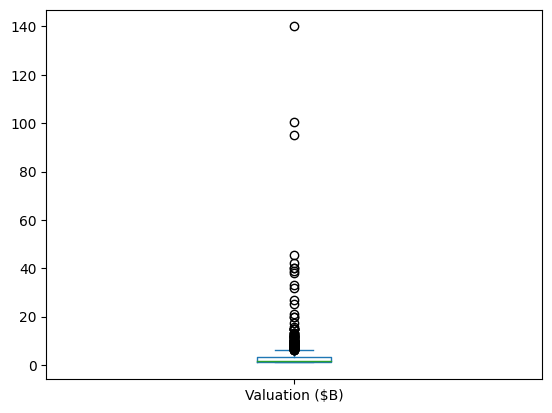

In [ ]:
df['Valuation ($B)'].plot.box(title = "")

[]

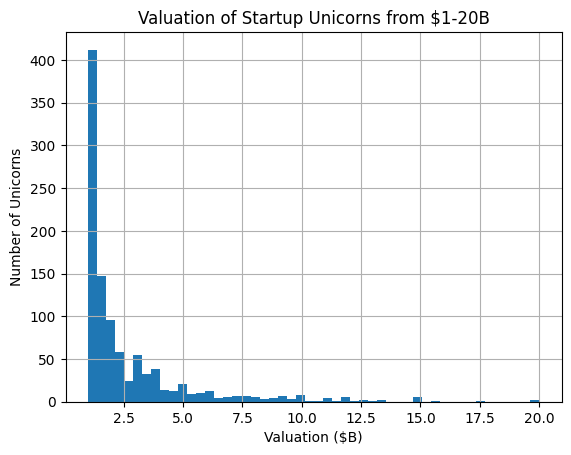

In [ ]:
value_hist = df["Valuation ($B)"].hist(range=[1, 20], bins=50)
value_hist.set_xlabel("Valuation ($B)")
value_hist.set_ylabel("Number of Unicorns")
value_hist.set_title("Valuation of Startup Unicorns from $1-20B")
value_hist.plot()

[]

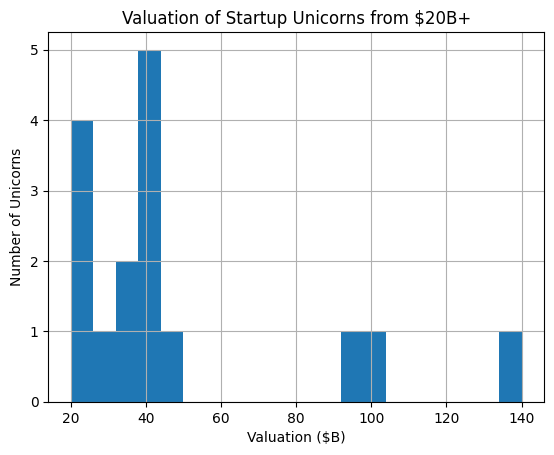

In [ ]:
gen_value_hist = df["Valuation ($B)"].hist(range=[20, 140], bins = 20)
gen_value_hist.set_xlabel("Valuation ($B)")
gen_value_hist.set_ylabel("Number of Unicorns")
gen_value_hist.set_title("Valuation of Startup Unicorns from $20B+")
gen_value_hist.plot()

[]

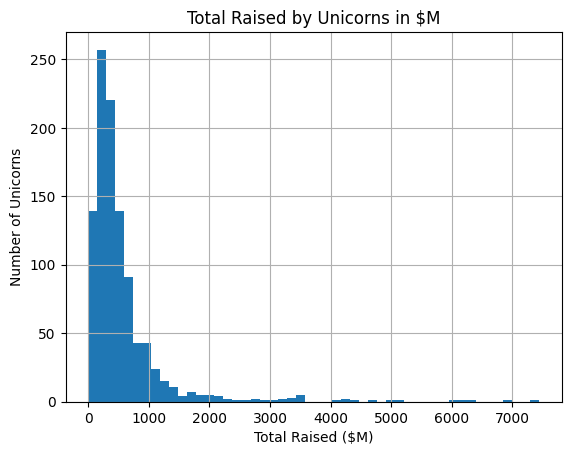

In [ ]:
raised_hist = df['Total Raised ($M)'].hist(bins = 50)
raised_hist.set_xlabel('Total Raised ($M)')
raised_hist.set_ylabel('Number of Unicorns')
raised_hist.set_title('Total Raised by Unicorns in $M')
raised_hist.plot()

array([<Axes: xlabel='Founded Year', ylabel='Number of Unicorns'>],
      dtype=object)

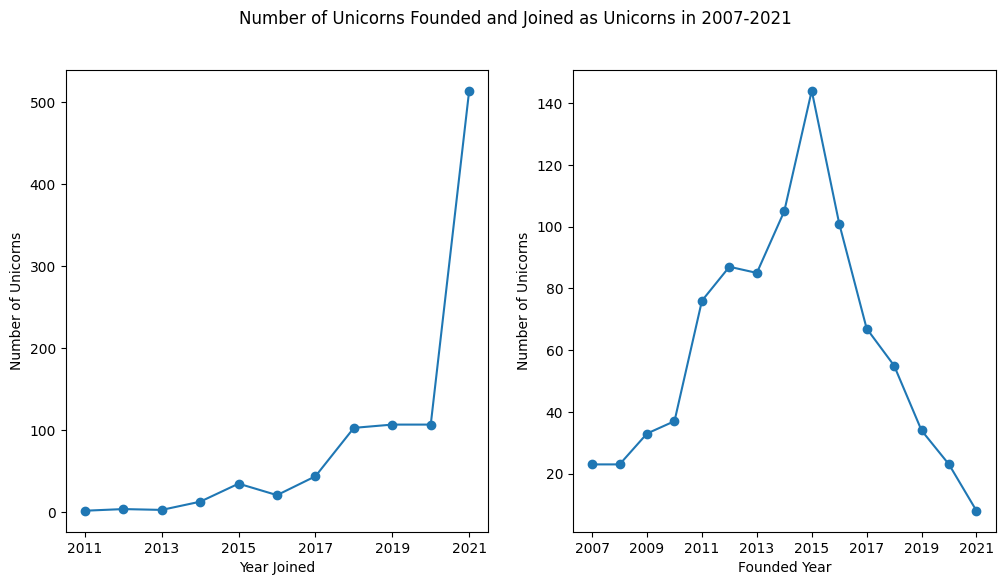

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12, 6))


df['Year Joined'].value_counts().reindex([(lambda x: str(x))(x) for x in range(2011,2022)]).plot.line(xlabel="Year Joined", ylabel="Number of Unicorns", ax = axes[0], marker='o', subplots=True)
df['Founded Year'].value_counts().reindex([(lambda x: str(x))(x) for x in range(2007,2022)]).plot.line(xlabel="Founded Year", ylabel="Number of Unicorns", title = 'Number of Unicorns Founded and Joined as Unicorns in 2007-2021', ax = axes[1], marker='o', subplots=True)

Mean: 7.032225579053374 years
Median: 6.0 years


<Axes: >

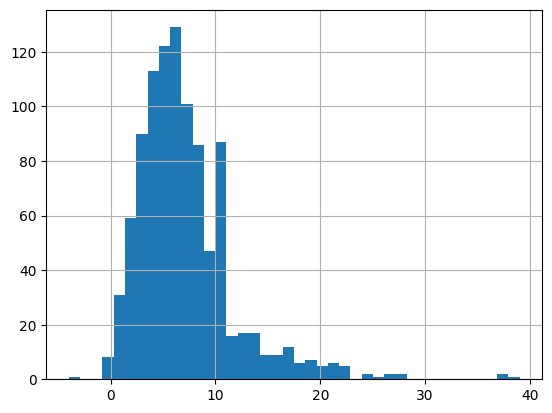

In [ ]:
print("Mean: " + str(df[ df['Years to Become Unicorn'] < 90 ]['Years to Become Unicorn'].mean()) + " years")
print("Median: " + str(df[ df['Years to Become Unicorn'] < 90 ]['Years to Become Unicorn'].median()) + " years")
df[ df['Years to Become Unicorn'] < 90 ]['Years to Become Unicorn'].hist(bins = 40)

In [ ]:
df[ df['Years to Become Unicorn'] < 0 ]

,Company,Valuation ($B),Date Joined,Year Joined,Founded Year,Years to Become Unicorn,Country,City,Industry,Investors,Total Raised ($M),Financial Stage,Investor Count,Deal Terms,Portfolio Exits,Social media Presence,Media As Int
599,Yidian Zixun,1.4,10/17/2017,2017,2021,-4,China,Beijing,Mobile & telecommunications,"Phoenix New Media, Tianjin Haihe Industry Fund",15.0,0,2,0,0,Y,1


array([<Axes: >], dtype=object)

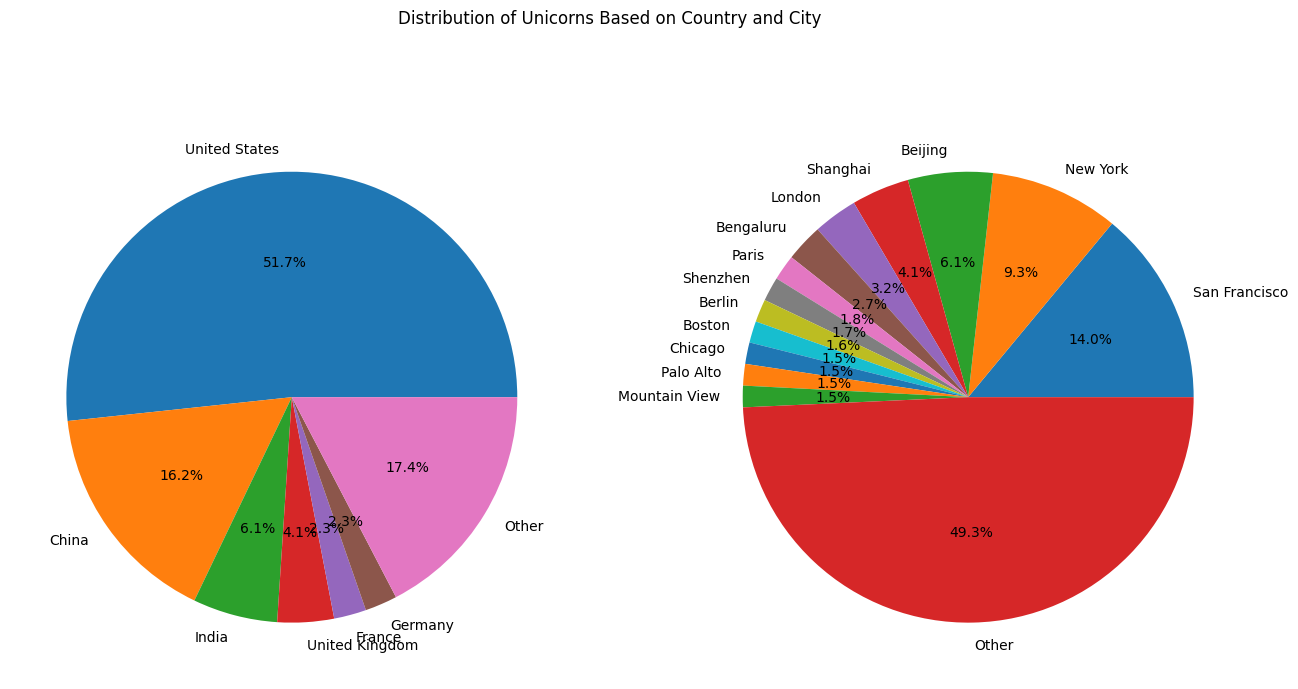

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(16, 8))

country_counts = df['Country'].value_counts()
total_countries = len(df['Country'])
country_percentages = (country_counts / total_countries) * 100

threshold = 2
small_countries = country_percentages[country_percentages < threshold]
other_total_percentage = small_countries.sum()
country_percentages = country_percentages[country_percentages >= threshold]
country_percentages['Other'] = other_total_percentage

country_percentages.plot.pie(autopct='%.1f%%', figsize=(8, 8), title='Distribution of Unicorns Based on Country and City', ylabel='', ax = axes[0], subplots=True)


country_counts = df['City'].value_counts()
total_countries = len(df['City'])
country_percentages = (country_counts / total_countries) * 100

threshold = 1.4
small_countries = country_percentages[country_percentages < threshold]
other_total_percentage = small_countries.sum()
country_percentages = country_percentages[country_percentages >= threshold]
country_percentages['Other'] = other_total_percentage
country_percentages.plot.pie(autopct='%.1f%%', figsize=(6, 6), title='Distribution of Unicorns Based on Country and City', ylabel='', ax = axes[1], subplots=True)

<Axes: title={'center': 'Industries of Startup Unicorns'}>

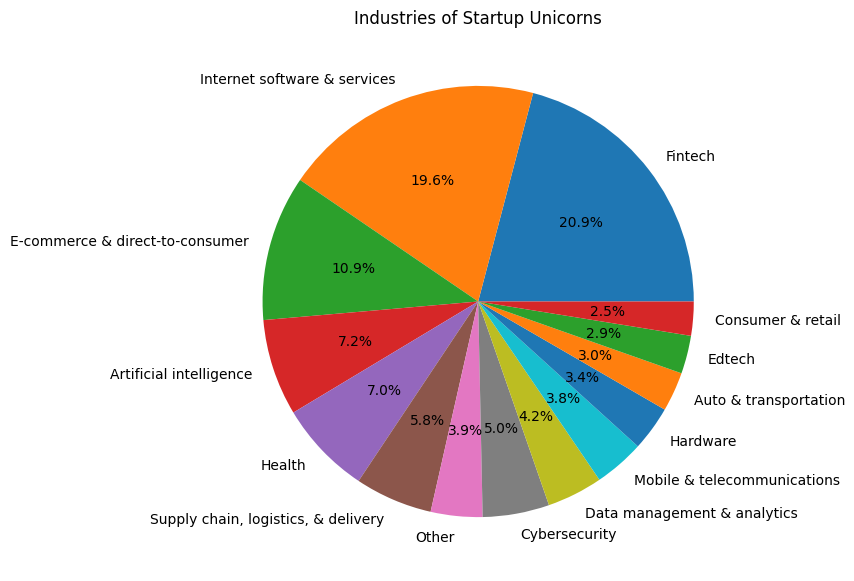

In [ ]:
country_counts = df['Industry'].value_counts()
total_countries = len(df['Industry'])
country_percentages = (country_counts / total_countries) * 100

threshold = 2
small_countries = country_percentages[country_percentages < threshold]
other_total_percentage = small_countries.sum()
country_percentages = country_percentages[country_percentages >= threshold]
country_percentages['Other'] = other_total_percentage

country_percentages.plot.pie(autopct='%.1f%%', figsize=(7, 7), title='Industries of Startup Unicorns', ylabel='')

None of the Categories: 988


<Axes: title={'center': 'Financial Stage of Startup Unicorns'}, ylabel='Number of Unicorns'>

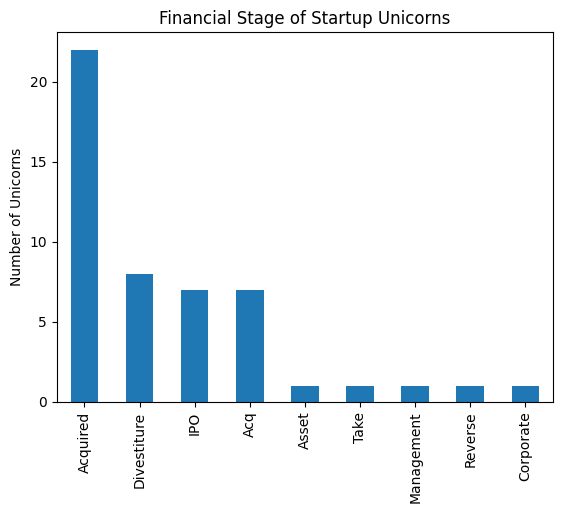

In [ ]:
print('None of the Categories: ' + str(len(df[df['Financial Stage']  == 0])))
df[ df['Financial Stage'] != 0 ]['Financial Stage'].value_counts().plot.bar(title='Financial Stage of Startup Unicorns', ylabel='Number of Unicorns')

Investor Count Mean: 14.418514946962391
Investor Count Median: 13.0


[]

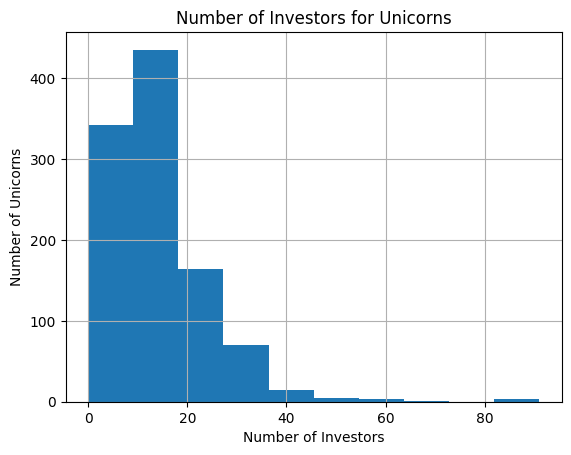

In [ ]:
print("Investor Count Mean: " + str(df["Investor Count"].mean()))
print("Investor Count Median: " + str(df["Investor Count"].median()))
investor_count = df['Investor Count'].hist()
investor_count.set_title('Number of Investors for Unicorns')
investor_count.set_xlabel('Number of Investors')
investor_count.set_ylabel('Number of Unicorns')
investor_count.plot()

<Axes: title={'center': 'Social Media Presence in Startup Unicorns'}>

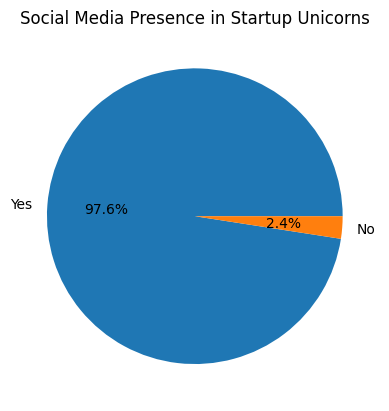

In [ ]:
df['Social media Presence'].value_counts().rename({'Y': 'Yes', 'N': 'No'}).plot.pie(autopct='%.1f%%', ylabel='', title = 'Social Media Presence in Startup Unicorns')

<h2>Compare Probabilities with Simulations</h2>

<h5>1) What is the probability that if you founded 5 startup unicorns, at least one of them will cross $10B in valuation?</h5>

<h5>2) What is the probability that if you founded 5 startup unicorns IN SAN FRANCISCO, at least one of them will cross $10B in valuation?</h5>



In [ ]:
def found_5():
  sample = df.sample(n = 5, replace = True)
  return len(sample[ sample['Valuation ($B)'] >= 10 ])

def found_5_sf():
  sample = df[ df['City'] == 'San Francisco' ].sample(n = 5, replace = True)
  return len(sample[ sample['Valuation ($B)'] >= 10 ])

print(found_5(), found_5_sf())

0 0


In [ ]:
data_10b = []
data_10b_sf = []

for i in range(10000):
  data_10b.append(found_5())
  data_10b_sf.append(found_5_sf())

df_10b = pd.DataFrame()
df_10b['Anywhere Unicorns'] = data_10b
df_10b['San Franciso Unicorns'] = data_10b_sf

df_10b

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 6))

df_10b['Anywhere Unicorns'].value_counts().reindex(list(range(0,6))).plot.bar(xlabel = 'Number of Unicorns Anywhere >$10B', ylabel = 'Number of Trials', ax = axes[0], subplots=True)
df_10b['San Franciso Unicorns'].value_counts().reindex(list(range(0,6))).plot.bar(xlabel = 'Number of Unicorns in SF >$10B', ylabel = 'Number of Trials', ax = axes[1], subplots=True)

In [ ]:
prob_10b = len(df_10b[ df_10b['Anywhere Unicorns'] >= 1 ]) / len(df_10b)
print(prob_10b)

prob_10b_sf = len(df_10b[ df_10b['San Franciso Unicorns'] >= 1 ]) / len(df_10b)
print(prob_10b_sf)

<h5>Probability of at Least 1 Unicorn Anywhere >= 10 billion dollars is 21.51% </h5>
<h5>Probability of at Least 1 Unicorn IN SAN FRANSISCO >= 10 billion dollars is 51.18% </h5>

In [ ]:
Q1 = df['Valuation ($B)'].quantile(0.25)
Q3 = df['Valuation ($B)'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df.copy()

In [ ]:
import scipy.stats as st
import math

clean_val_mean = df_clean["Valuation ($B)"].mean()
clean_val_var = df_clean['Valuation ($B)'].var()
sample_size_clean_val = len(df_clean)

alpha = 0.05

Z_clean_val = st.norm(0, 1).ppf(1 - alpha/2)

a_clean_val = clean_val_mean - Z_clean_val*math.sqrt(clean_val_var/sample_size_clean_val)
b_clean_val = clean_val_mean + Z_clean_val*math.sqrt(clean_val_var/sample_size_clean_val)

print("Valuation Confidence Interval: [" + str(a_clean_val) + ", " + str(b_clean_val) + "] \n According to Fortune.com, $3.3 billion avg valuation")

Find the probability that the average valuation of unicorns is greater than the oberseved value.

In [ ]:
clt = 1 - st.norm(3.3, math.sqrt(clean_val_var/sample_size_clean_val)).cdf(clean_val_mean)

clt

HYPOTHESIS TESTING

Null Hypothesis: Unicorns' valuation is 4 times as much as the money they raised

Alternative Hypothesis: Unicorns' valuation is MORE than 4 times as much as the money they raised


In [ ]:
df_hyp = df[['Valuation ($B)', 'Total Raised ($M)']]
temp = []
for i in df_hyp['Valuation ($B)']:
  temp.append(1000*i)
df_hyp['Valuation ($B)'] = temp

temp = []
for i in range(len(df_hyp)):
  temp.append(df_hyp["Valuation ($B)"][i] - df_hyp['Total Raised ($M)'][i]*4)
df_hyp['Comparison'] = temp


df_hyp

In [ ]:
temp_hist = df_hyp['Comparison'].hist(bins = 50, range = [-20000, 20000])
temp_hist.set_xlabel('Comparing Valuation and 4 times Money Raised ($M)')
temp_hist.set_ylabel('Number of Unicorns')
temp_hist.plot()

In [ ]:
import statsmodels.stats.weightstats

statsmodels.stats.weightstats.ztest(df_hyp['Comparison'], value = 0, alternative = 'larger')

LINEAR REGRESSION

In [ ]:
df.corr()

In [ ]:
cols = ['Year Joined', 'Founded Year', 'Total Raised ($M)', "Investor Count",	"Deal Terms",	"Portfolio Exits", 'Media As Int']

df_train = df.sample(frac = 0.80)
df_test = df[ ~df.index.isin(df_train.index) ]

X_train = df_train[cols]
X_test = df_test[cols]
Y_train = df_train['Valuation ($B)']
Y_test = df_test['Valuation ($B)']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) ## Create a model

model.fit(X_train, Y_train) ## Fit the model to the data

In [ ]:
df_lr = pd.DataFrame()
df_lr['Actual Valuation'] = Y_test
df_lr['Predictions'] = model.predict(X_test)

df_lr

In [ ]:
MSE = ((Y_test - model.predict(X_test) )**2).mean()
MSE

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(Y_train, model.predict(X_train))
R2

In [ ]:
df[ df['Valuation ($B)'] <= 20 ].plot.scatter(x = 'Total Raised ($M)', y = "Valuation ($B)")

In [ ]:
df[ df['Valuation ($B)'] <= 20 ].plot.scatter(x = 'Investor Count', y = "Valuation ($B)")